In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


"Description" and "Customer ID" for some of the records are missing

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France


## Compute weekly sales.
Sum the sales for each week. Sales can be computed by multiplying Quantity and UnitPrice.

In [5]:
df['Sales'] = df['Quantity'] * df['Price']
weekly_sales = df['Sales'].resample('W').sum()

In [6]:
weekly_sales

InvoiceDate
2009-12-06    258496.32
2009-12-13    232310.10
2009-12-20    256240.20
2009-12-27     52800.49
2010-01-03         0.00
                ...    
2011-11-13    346560.14
2011-11-20    380407.57
2011-11-27    308185.02
2011-12-04    319874.99
2011-12-11    300623.22
Freq: W-SUN, Name: Sales, Length: 106, dtype: float64

<Axes: xlabel='InvoiceDate'>

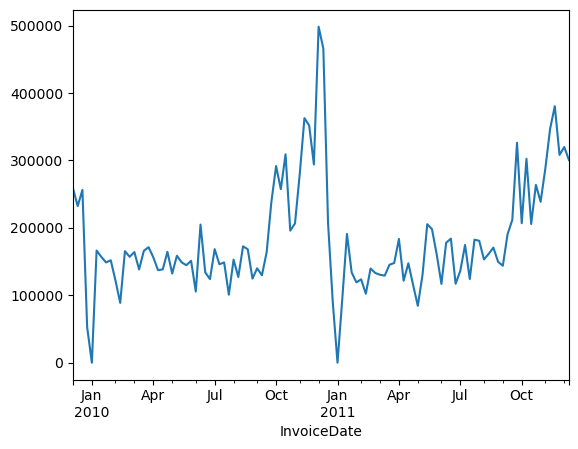

In [7]:
weekly_sales.plot()

we see in the data that the sales usually follow a base line during the year but close to the end of the year there is a rapid increase in sales just before new year's eve where the sales go to zero. and then the sales goes back to the baseline in the new year

In [8]:
# plt.plot(np.log(weekly_sales))

In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(weekly_sales)
print("The p-value for the ADF test is ", result[1])

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


The p-value for the ADF test is  0.0009528314573261631


Augmented Dickey-Fuller (ADF) test is less that 0.05 therefore we reject the null hypothesis of the test and it basically says that the time series is stationary

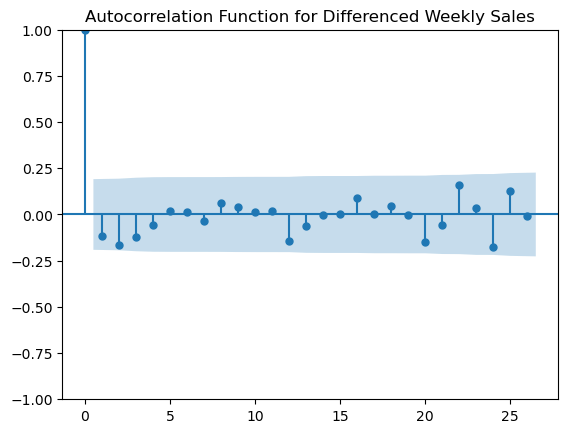

c:\Users\omidreza\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


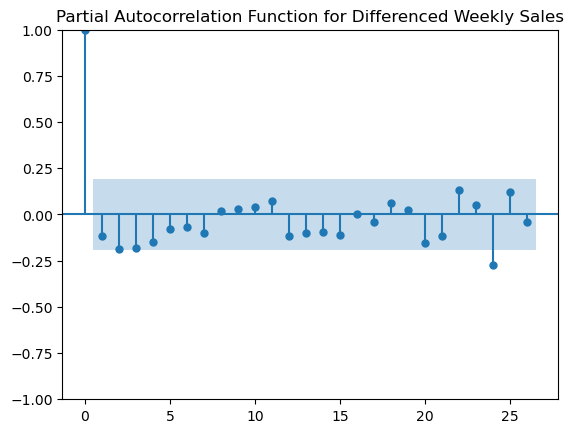

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

chg_weekly_sales = weekly_sales.diff().dropna()

# Plot ACF
plt.figure()
plot_acf(chg_weekly_sales, lags=52/2, ax=plt.gca())
plt.title('Autocorrelation Function for Differenced Weekly Sales')
plt.show()

# Plot PACF
plt.figure()
plot_pacf(chg_weekly_sales, lags=52/2, ax=plt.gca())
plt.title('Partial Autocorrelation Function for Differenced Weekly Sales')
plt.show()

A sinusoidal shape in both ACF and PACF suggests a seasonal or cyclical pattern in the data, which is often the case in sales data that can have recurring patterns, for instance due to seasonal shopping behavior or specific events.

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# order is coming from grid search and seasonal behavior is 52 weeks per year

model = SARIMAX(weekly_sales, order=(2, 1, 1), seasonal_order=(2, 1, 1, 52))
model_fit = model.fit()

c:\Users\omidreza\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


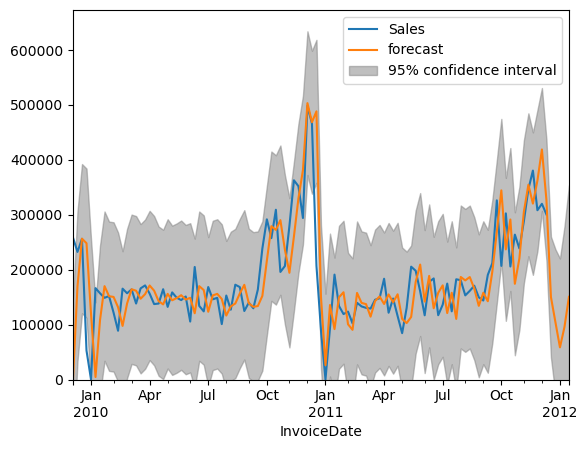

In [35]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
weekly_sales.plot(ax=ax)
plot_predict(model_fit, start=0, end=len(weekly_sales)+4, ax=ax)
plt.ylim(bottom=0)
plt.show()

In [25]:
forecast = model_fit.predict(start=0, end=len(weekly_sales)+4)

In [26]:
forecast

2009-12-06         0.000000
2009-12-13    189317.637084
2009-12-20    252733.786429
2009-12-27    246107.789352
2010-01-03    106254.908044
                  ...      
2011-12-18    185346.848824
2011-12-25     83724.754085
2012-01-01     28820.144190
2012-01-08    114329.250834
2012-01-15    154500.146524
Freq: W-SUN, Name: predicted_mean, Length: 111, dtype: float64

In [27]:
weekly_sales

InvoiceDate
2009-12-06    258496.32
2009-12-13    232310.10
2009-12-20    256240.20
2009-12-27     52800.49
2010-01-03         0.00
                ...    
2011-11-13    346560.14
2011-11-20    380407.57
2011-11-27    308185.02
2011-12-04    319874.99
2011-12-11    300623.22
Freq: W-SUN, Name: Sales, Length: 106, dtype: float64